## Library

In [1]:
import os
import math
import random

import numpy as np
import matplotlib.pyplot as plt

import squigglepy as sq
from squigglepy import bayes
from squigglepy.numbers import K, M, B, T

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint
from datetime import datetime as dt
print('Loaded 1')

exec(open('utils.py').read())
print('Loaded 2')

exec(open('modules/tai_timelines.py').read())
print('Loaded TAI timelines module')


Loaded 1
Loaded 2
Loaded TAI timelines module


## Variables

In [2]:
# Global variables - probably don't want to change these but you could.
RUNS = 10000                                      # Number of runs to do (default 10000)
MAX_YEAR = CURRENT_YEAR + 100                     # What year to end the run on?
years = list(range(CURRENT_YEAR, MAX_YEAR))       # CURRENT_YEAR defined in utils.py
VARIABLE_SETS = {}


VARIABLE_SETS['Cotra2020'] = {
    'initial_gdp': 24*T,                  # GDP in `CURRENT_YEAR` of country that will develop TAI (default: 24 trillion)
    'algo_doubling_rate_max': 3.5,        # 90% CI, algorithms get twice as efficient every X years (maximum)
    'algo_doubling_rate_min': 2,          # 90% CI, algorithms get twice as efficient every X years (minimum)
    'min_reduction': 2,                   # 90% CI, the minimum amount of OOMs of reduction in TAI size algorithm improvements could acheive
    'max_reduction': 5,                   # 90% CI, the maximum amount of OOMs of reduction in TAI size algorithm improvements could acheive
    'initial_flop_per_dollar': 17.6,      # 90% CI, as of today, we can buy 10^X FLOP per $
    'flop_halving_rate': 2.5,             # 90% CI, the cost of FLOP per $ halves every X years
    'max_flop_per_dollar': 24,            # 90% CI, the cheapest FLOP will get is 10^X FLOPs per $
    'initial_pay': 9,                     # 90% CI, as of today the maximum we would pay for TAI is $10^X
    'gdp_growth': 1.03,                   # 90% CI, GDP will increase by a factor of X each year
    'max_gdp_frac': 0.01,                 # 90% CI, the maximum % of GDP that would be spent on TAI is $10^X
    'spend_doubling_time': 2.5            # 90% CI, our willingness to spend on TAI doubles every X years
}


VARIABLE_SETS['Cotra2022'] = deepcopy(VARIABLE_SETS['Cotra2020'])
VARIABLE_SETS['Cotra2022']['initial_flop_per_dollar'] = 18.57
print('Loaded')

Loaded


In [3]:
cotra_2020_tai_flop_size = sq.sample(load_cache_file='caches/cotra_2020')  # Cache generated in "Anchors" notebook
print('Cache from: {}'.format(dt.fromtimestamp(os.path.getmtime('caches/cotra_2020.sqcache.npy'))))

cotra_2020_tai_flop_size = [round(t, 1) for t in cotra_2020_tai_flop_size]
# 90% CI, it takes 10^X FLOP to run a transformative AI at inference.
# Note: A petaflop/s-day (pfs-day) consists of performing 10^15 neural net operations per second for one day, or a total of about 10^20 operations
VARIABLE_SETS['Cotra2020']['tai_flop_size'] = cotra_2020_tai_flop_size
sq.get_percentiles(cotra_2020_tai_flop_size)


Cache from: 2024-04-26 10:07:58.237620


{1: 25.9,
 5: 27.3,
 10: 28.3,
 20: 30.4,
 30: 32.1,
 40: 33.7,
 50: 35.3,
 60: 36.9,
 70: 38.8,
 80: 41.0,
 90: 45.3,
 95: 63.3,
 99: 68.3}

In [4]:
cotra_2022_tai_flop_size = sq.sample(load_cache_file='caches/cotra_2022')  # Cache generated in "Anchors" notebook
print('Cache from: {}'.format(dt.fromtimestamp(os.path.getmtime('caches/cotra_2022.sqcache.npy'))))
cotra_2022_tai_flop_size = [round(t, 1) for t in cotra_2022_tai_flop_size]
VARIABLE_SETS['Cotra2022']['tai_flop_size'] = cotra_2022_tai_flop_size
sq.get_percentiles(cotra_2022_tai_flop_size)

Cache from: 2024-04-26 10:08:38.989981


{1: 25.3,
 5: 26.7,
 10: 27.4,
 20: 28.6,
 30: 29.9,
 40: 31.5,
 50: 32.9,
 60: 34.5,
 70: 36.2,
 80: 38.4,
 90: 42.3,
 95: 57.3,
 99: 67.2}

## Run Cotra 2020



## SAMPLE RUN 1 ##

In this simulation:
* It takes 42.9 log FLOP (~7.9 billion decillion) for transformative capabilities.
* Every 2 years algorithms get 2x better, with 5 log reductions possible.
* FLOP start at a cost of 17.6 log FLOP (~398.1 quadrillion) per 2025$USD.
* Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1.0 septillion) per 2025$USD.
* We are initially willing to pay 9.0 log 2025$USD (~995.9 million).
* This doubles every 2.5 year to a max of 1.0% of GDP (initially ~240.0 billion 2025$USD).
* GDP grows at a rate of 1.03x per year.
---
2025 - TAI takes 42.9 logFLOP which costs 25.3 log 2025$USD to buy vs. WTP at 9.0 (buys 26.6 log FLOP or 26.6 2025-log-eFLOP)
2026 - TAI takes 42.7 logFLOP which costs 25.0 log 2025$USD to buy vs. WTP at 9.1 (buys 26.8 log FLOP or 27.0 2025-log-eFLOP)
2027 - TAI takes 42.6 logFLOP which costs 24.8 log 2025$USD to buy vs. WTP at 9.2 (buys 27.1 log FLOP or 27.4 2025-log-eFLOP)
2028 - TAI takes 42.4 logFLOP which costs 

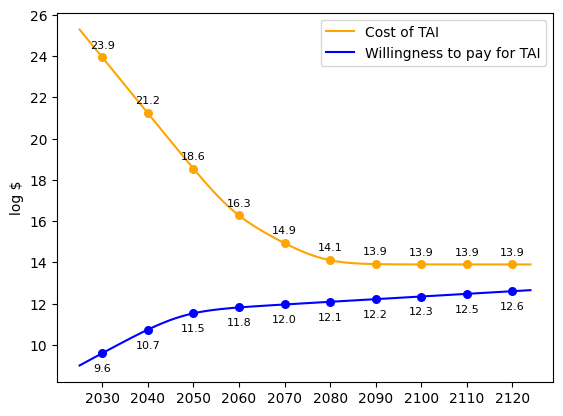



## SAMPLE RUN 2 ##

In this simulation:
* It takes 33.1 log FLOP (~1.3 decillion) for transformative capabilities.
* Every 2.5 years algorithms get 2x better, with 2 log reductions possible.
* FLOP start at a cost of 17.6 log FLOP (~398.1 quadrillion) per 2025$USD.
* Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1.0 septillion) per 2025$USD.
* We are initially willing to pay 9.0 log 2025$USD (~995.9 million).
* This doubles every 2.5 year to a max of 1.0% of GDP (initially ~240.0 billion 2025$USD).
* GDP grows at a rate of 1.03x per year.
---
2025 - TAI takes 33.1 logFLOP which costs 15.5 log 2025$USD to buy vs. WTP at 9.0 (buys 26.6 log FLOP or 26.6 2025-log-eFLOP)
2026 - TAI takes 33.0 logFLOP which costs 15.3 log 2025$USD to buy vs. WTP at 9.1 (buys 26.8 log FLOP or 27.0 2025-log-eFLOP)
2027 - TAI takes 32.9 logFLOP which costs 15.0 log 2025$USD to buy vs. WTP at 9.2 (buys 27.1 log FLOP or 27.3 2025-log-eFLOP)
2028 - TAI takes 32.7 logFLOP which costs 14.8 l

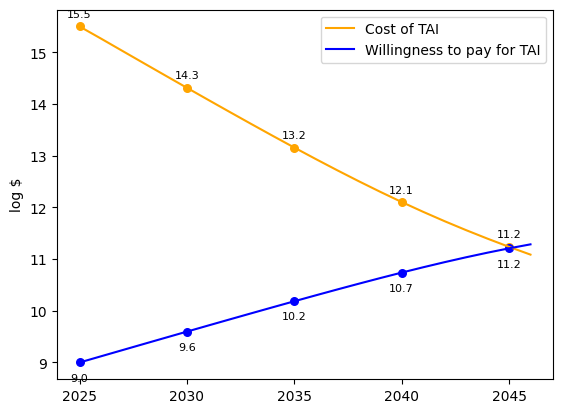



## SAMPLE RUN 3 ##

In this simulation:
* It takes 41.1 log FLOP (~125.9 million decillion) for transformative capabilities.
* Every 2 years algorithms get 2x better, with 4 log reductions possible.
* FLOP start at a cost of 17.6 log FLOP (~398.1 quadrillion) per 2025$USD.
* Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1.0 septillion) per 2025$USD.
* We are initially willing to pay 9.0 log 2025$USD (~995.9 million).
* This doubles every 2.5 year to a max of 1.0% of GDP (initially ~240.0 billion 2025$USD).
* GDP grows at a rate of 1.03x per year.
---
2025 - TAI takes 41.1 logFLOP which costs 23.5 log 2025$USD to buy vs. WTP at 9.0 (buys 26.6 log FLOP or 26.6 2025-log-eFLOP)
2026 - TAI takes 40.9 logFLOP which costs 23.2 log 2025$USD to buy vs. WTP at 9.1 (buys 26.8 log FLOP or 27.0 2025-log-eFLOP)
2027 - TAI takes 40.8 logFLOP which costs 23.0 log 2025$USD to buy vs. WTP at 9.2 (buys 27.1 log FLOP or 27.4 2025-log-eFLOP)
2028 - TAI takes 40.6 logFLOP which cost

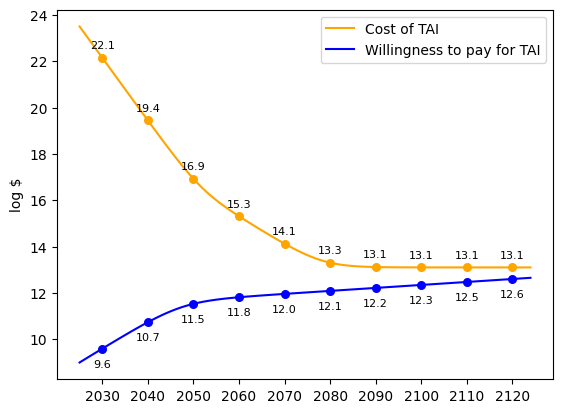



## RUN TIMELINES MODEL ##
Generating Bayes net with 5 cores...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1817.04it/s]


Shuffling data...
Writing data...
Waiting for other cores...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 601.89it/s]

...Collected!
Caching in-memory...
...Cached!
...Reducing
...Reduced!
...All done!

## DISTRIBUTION OF TAI ARRIVAL DATE ##
['5%: 2028',
 '10%: 2031',
 '15%: 2034',
 '20%: 2037',
 '25%: 2040',
 '35%: 2045',
 '50%: 2052',
 '60%: 2064',
 '75%: 2083',
 '80%: >2125',
 '90%: >2125',
 '95%: >2125']


## DISTRIBUTION OF RELATIVE TAI ARRIVAL DATE ##
['5%: 3 years from now',
 '10%: 6 years from now',
 '15%: 9 years from now',
 '20%: 12 years from now',
 '25%: 15 years from now',
 '35%: 20 years from now',
 '50%: 27 years from now',
 '60%: 39 years from now',
 '75%: 58 years from now',
 '80%: >100 years from now',
 '90%: >100 years from now',
 '95%: >100 years from now']
(Mean: 42 years from now)


## TAI ARRIVAL DATE BY BIN ##
This year: 2.4%
2026-2027: 2.2%
2028-2030: 4.6%
2030-2034: 7.8%
2035-2039: 9.4%
2040-2049: 22.2%
2050-2059: 9.2%
2060-2069: 12.8%
2070-2079: 5.8%
2080-2089: 1.1%
2090-2099: 0.6%
2100-2109: 0.4%
2110-2119: 0.2%
>2125: 22.6%


## TAI ARRIVAL DATE BY YEAR ##
By EOY 2025: 2.4%

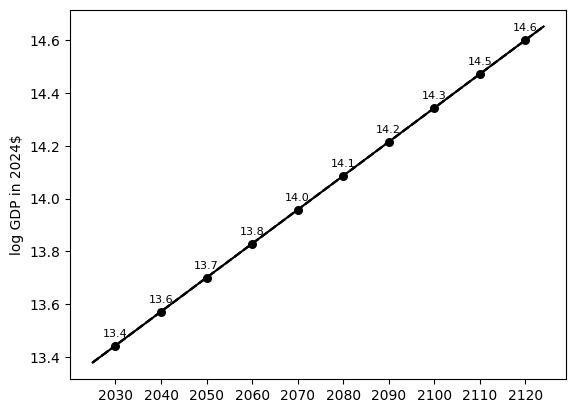

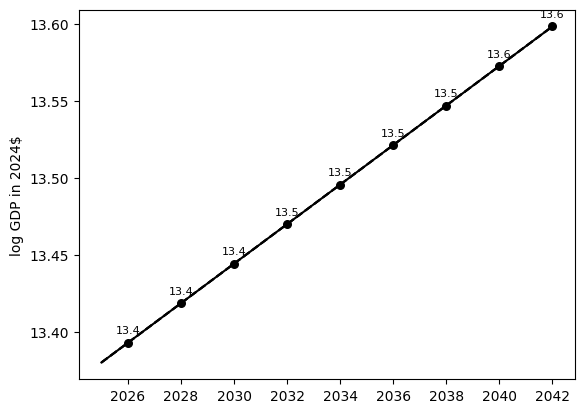



## Willingness to Pay Over Time ##
Year: 2025 - willingness log 2024$USD per year 9.0 (~995.9 million) 80% CI 9.0 (~995.9 million) - 9.0 (~995.9 million)
Year: 2026 - willingness log 2024$USD per year 9.1 (~1.3 billion) 80% CI 9.1 (~1.3 billion) - 9.1 (~1.3 billion)
Year: 2027 - willingness log 2024$USD per year 9.2 (~1.7 billion) 80% CI 9.2 (~1.7 billion) - 9.2 (~1.7 billion)
Year: 2028 - willingness log 2024$USD per year 9.4 (~2.3 billion) 80% CI 9.4 (~2.3 billion) - 9.4 (~2.3 billion)
Year: 2029 - willingness log 2024$USD per year 9.5 (~3.0 billion) 80% CI 9.5 (~3.0 billion) - 9.5 (~3.0 billion)
Year: 2030 - willingness log 2024$USD per year 9.6 (~3.9 billion) 80% CI 9.6 (~3.9 billion) - 9.6 (~3.9 billion)
Year: 2031 - willingness log 2024$USD per year 9.7 (~5.2 billion) 80% CI 9.7 (~5.2 billion) - 9.7 (~5.2 billion)
Year: 2032 - willingness log 2024$USD per year 9.8 (~6.8 billion) 80% CI 9.8 (~6.8 billion) - 9.8 (~6.8 billion)
Year: 2033 - willingness log 2024$USD per year 10.0 (

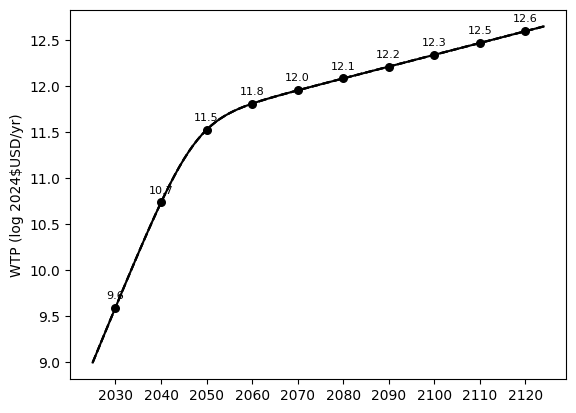

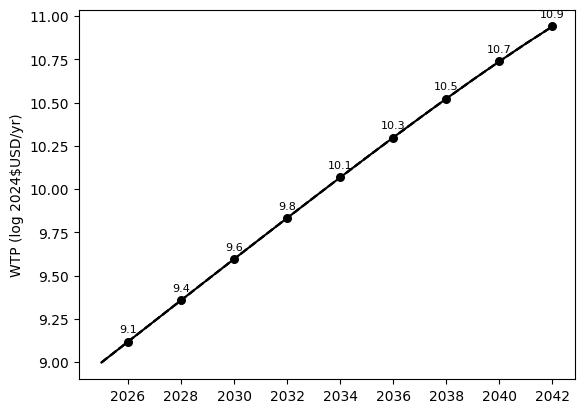



## Actual FLOP Needed to Make TAI (Given Algorithmic Progress) ##
Year: 2025 - logFLOP needed for TAI 35.0 (~112.2 decillion) 80% CI 30.3 (~2.0 nonillion) - 41.0 (~100.0 million decillion)
Year: 2026 - logFLOP needed for TAI 34.9 (~79.5 decillion) 80% CI 30.2 (~1.6 nonillion) - 40.8 (~70.7 million decillion)
Year: 2027 - logFLOP needed for TAI 34.7 (~56.2 decillion) 80% CI 30.1 (~1.3 nonillion) - 40.7 (~50.0 million decillion)
Year: 2028 - logFLOP needed for TAI 34.6 (~39.8 decillion) 80% CI 30.0 (~1.0 nonillion) - 40.5 (~35.4 million decillion)
Year: 2029 - logFLOP needed for TAI 34.4 (~28.2 decillion) 80% CI 29.9 (~811.8 octillion) - 40.4 (~25.0 million decillion)
Year: 2030 - logFLOP needed for TAI 34.3 (~19.9 decillion) 80% CI 29.8 (~648.4 octillion) - 40.2 (~17.7 million decillion)
Year: 2031 - logFLOP needed for TAI 34.2 (~14.1 decillion) 80% CI 29.7 (~518.8 octillion) - 40.1 (~12.5 million decillion)
Year: 2032 - logFLOP needed for TAI 34.0 (~10.0 decillion) 80% CI 29.6 (~415.

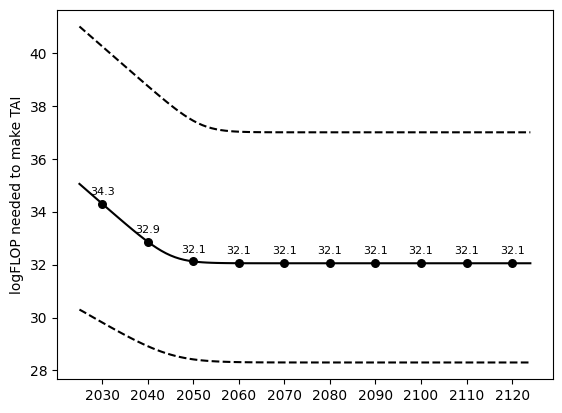

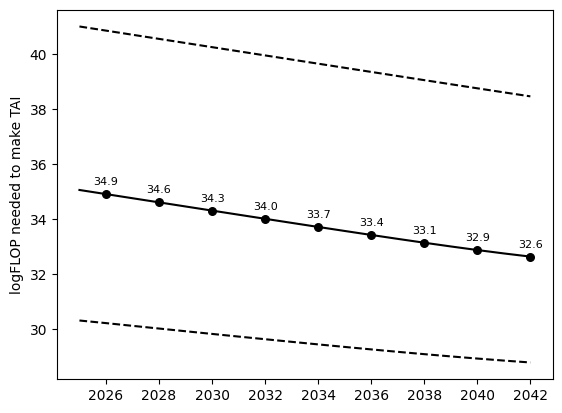



## FLOP per Dollar (Given Declining Costs) ##
Year: 2025 - logFLOP per 2024$1USD 17.6 (~398.1 quadrillion) 80% CI 17.6 (~398.1 quadrillion) - 17.6 (~398.1 quadrillion)
Year: 2026 - logFLOP per 2024$1USD 17.7 (~525.3 quadrillion) 80% CI 17.7 (~525.3 quadrillion) - 17.7 (~525.3 quadrillion)
Year: 2027 - logFLOP per 2024$1USD 17.8 (~693.1 quadrillion) 80% CI 17.8 (~693.1 quadrillion) - 17.8 (~693.1 quadrillion)
Year: 2028 - logFLOP per 2024$1USD 18.0 (~914.6 quadrillion) 80% CI 18.0 (~914.6 quadrillion) - 18.0 (~914.6 quadrillion)
Year: 2029 - logFLOP per 2024$1USD 18.1 (~1.2 quintillion) 80% CI 18.1 (~1.2 quintillion) - 18.1 (~1.2 quintillion)
Year: 2030 - logFLOP per 2024$1USD 18.2 (~1.6 quintillion) 80% CI 18.2 (~1.6 quintillion) - 18.2 (~1.6 quintillion)
Year: 2031 - logFLOP per 2024$1USD 18.3 (~2.1 quintillion) 80% CI 18.3 (~2.1 quintillion) - 18.3 (~2.1 quintillion)
Year: 2032 - logFLOP per 2024$1USD 18.4 (~2.8 quintillion) 80% CI 18.4 (~2.8 quintillion) - 18.4 (~2.8 quintillion)


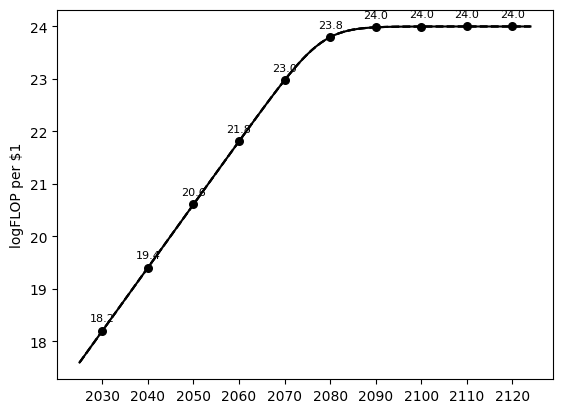

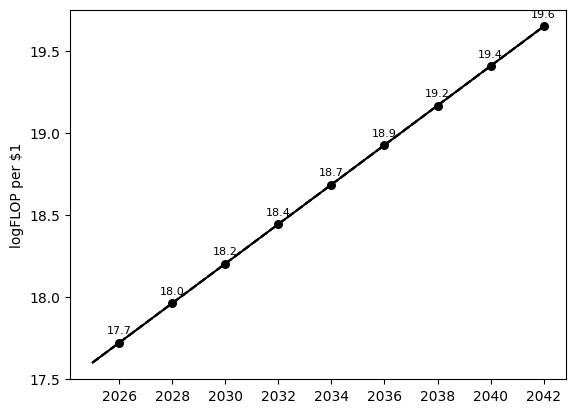



## Max Possible OOM Reduction in TAI FLOP Size ##
TAI log FLOP 20 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 21 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 22 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 23 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 24 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 25 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 26 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 27 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 28 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 29 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 30 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 31 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 32 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 33 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2

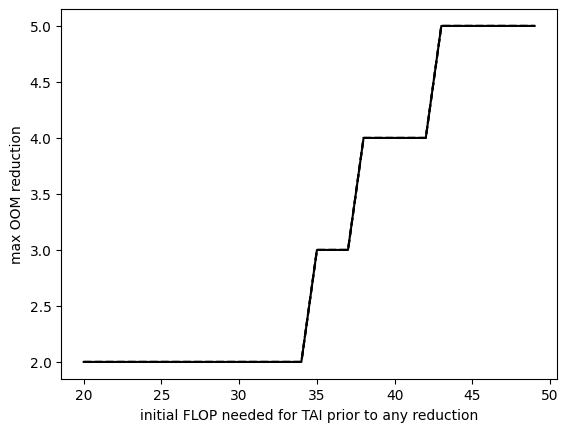



## Halving time (years) of compute requirements ##
TAI log FLOP 20 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 21 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 22 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 23 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 24 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 25 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 26 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 27 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 28 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 29 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 30 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 31 -> algo doubling rate 3.0yrs (80% CI: 3.0 to 3.0)
TAI log FLOP 32 -> algo doubling rate 2.5yrs (80% CI: 2.5 to 2.5)
TAI log FLOP 33 -> algo doubling rate 2.5yrs (80% CI: 2.5 to 2.5)
TAI log FLOP 34 -> algo

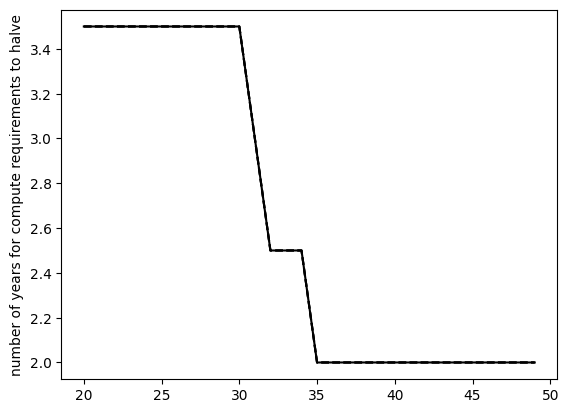



## Dollars Needed to Buy TAI (Given Algorithmic Progress and Decline in Cost per FLOP) ##
Year: 2025 - 17.5 log 2024$USD to buy TAI (~281.8 quadrillion) 80% CI 12.7 (~5.0 trillion) - 23.4 (~251.2 sextillion)
Year: 2026 - 17.2 log 2024$USD to buy TAI (~151.2 quadrillion) 80% CI 12.5 (~3.1 trillion) - 23.1 (~134.6 sextillion)
Year: 2027 - 16.9 log 2024$USD to buy TAI (~81.1 quadrillion) 80% CI 12.3 (~1.8 trillion) - 22.9 (~72.1 sextillion)
Year: 2028 - 16.6 log 2024$USD to buy TAI (~43.5 quadrillion) 80% CI 12.0 (~1.1 trillion) - 22.6 (~38.7 sextillion)
Year: 2029 - 16.4 log 2024$USD to buy TAI (~23.3 quadrillion) 80% CI 11.8 (~672.6 billion) - 22.3 (~20.7 sextillion)
Year: 2030 - 16.1 log 2024$USD to buy TAI (~12.5 quadrillion) 80% CI 11.6 (~407.2 billion) - 22.0 (~11.1 sextillion)
Year: 2031 - 15.8 log 2024$USD to buy TAI (~6.7 quadrillion) 80% CI 11.4 (~246.9 billion) - 21.8 (~6.0 sextillion)
Year: 2032 - 15.6 log 2024$USD to buy TAI (~3.6 quadrillion) 80% CI 11.2 (~150.0 billion) -

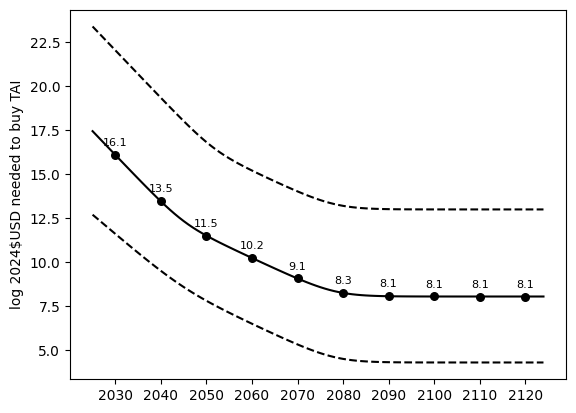

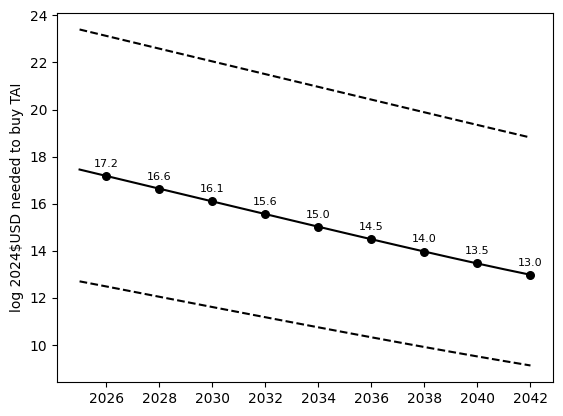



## Actual FLOP at Max Spend ##
Year: 2025 - max log FLOP 26.6 (~396.5 septillion) 80% CI 26.6 (~396.5 septillion) - 26.6 (~396.5 septillion)
Year: 2026 - max log FLOP 26.8 (~689.5 septillion) 80% CI 26.8 (~689.5 septillion) - 26.8 (~689.5 septillion)
Year: 2027 - max log FLOP 27.1 (~1.2 octillion) 80% CI 27.1 (~1.2 octillion) - 27.1 (~1.2 octillion)
Year: 2028 - max log FLOP 27.3 (~2.1 octillion) 80% CI 27.3 (~2.1 octillion) - 27.3 (~2.1 octillion)
Year: 2029 - max log FLOP 27.6 (~3.6 octillion) 80% CI 27.6 (~3.6 octillion) - 27.6 (~3.6 octillion)
Year: 2030 - max log FLOP 27.8 (~6.3 octillion) 80% CI 27.8 (~6.3 octillion) - 27.8 (~6.3 octillion)
Year: 2031 - max log FLOP 28.0 (~10.9 octillion) 80% CI 28.0 (~10.9 octillion) - 28.0 (~10.9 octillion)
Year: 2032 - max log FLOP 28.3 (~18.9 octillion) 80% CI 28.3 (~18.9 octillion) - 28.3 (~18.9 octillion)
Year: 2033 - max log FLOP 28.5 (~32.6 octillion) 80% CI 28.5 (~32.6 octillion) - 28.5 (~32.6 octillion)
Year: 2034 - max log FLOP 28.8 

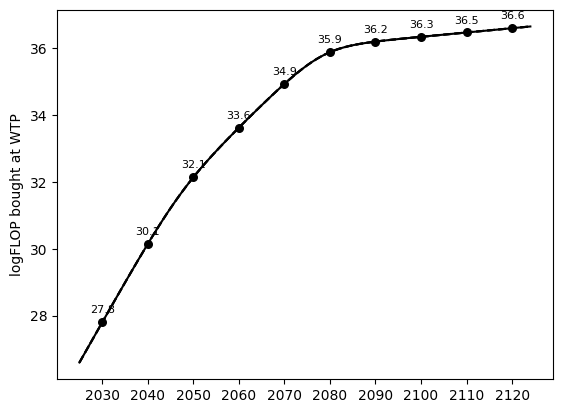

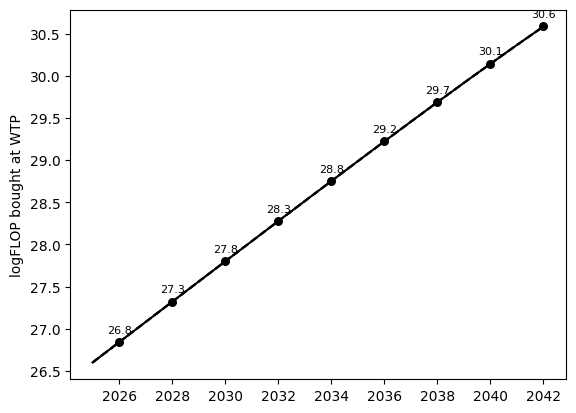



## Effective 2024-FLOP at Max Spend (given algorithmic progress and decline in $/FLOP) ##
Year: 2025 - max log effective 2024-FLOP 26.6 (~396.5 septillion) 80% CI 26.6 (~396.5 septillion) - 26.6 (~396.5 septillion)
Year: 2026 - max log effective 2024-FLOP 27.0 (~973.7 septillion) 80% CI 26.9 (~857.9 septillion) - 27.0 (~974.9 septillion)
Year: 2027 - max log effective 2024-FLOP 27.4 (~2.4 octillion) 80% CI 27.3 (~1.9 octillion) - 27.4 (~2.4 octillion)
Year: 2028 - max log effective 2024-FLOP 27.8 (~5.9 octillion) 80% CI 27.6 (~4.1 octillion) - 27.8 (~5.9 octillion)
Year: 2029 - max log effective 2024-FLOP 28.2 (~14.4 octillion) 80% CI 27.9 (~8.9 octillion) - 28.2 (~14.5 octillion)
Year: 2030 - max log effective 2024-FLOP 28.5 (~35.3 octillion) 80% CI 28.3 (~19.3 octillion) - 28.6 (~35.5 octillion)
Year: 2031 - max log effective 2024-FLOP 28.9 (~86.4 octillion) 80% CI 28.6 (~41.9 octillion) - 28.9 (~87.0 octillion)
Year: 2032 - max log effective 2024-FLOP 29.3 (~211.0 octillion) 80% C

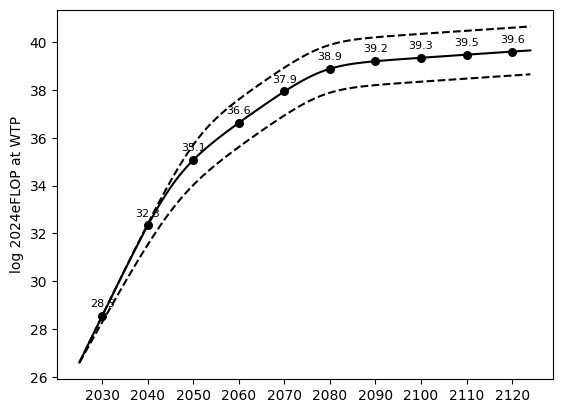

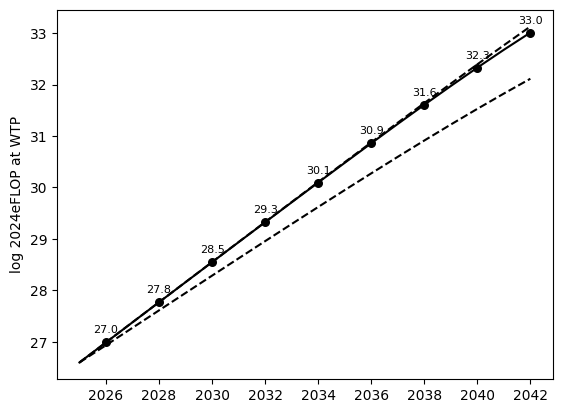


## TAI FLOP SIZE ##
{1: 26.0,
 5: 27.3,
 10: 28.2,
 20: 30.3,
 30: 31.9,
 40: 33.5,
 50: 35.05,
 60: 36.64,
 70: 38.8,
 80: 41.0,
 90: 46.11000000000001,
 95: 63.5,
 99: 68.003}


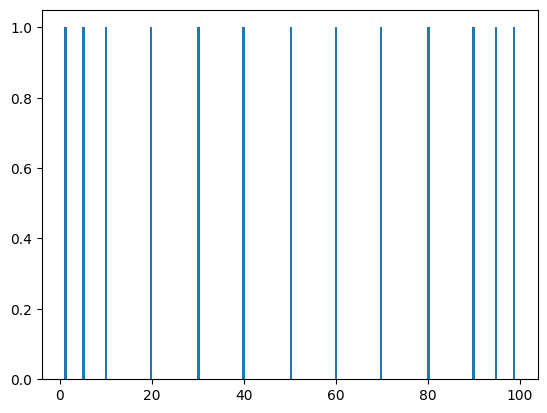



## MIN REDUCTION: 2 ##

## MAX REDUCTION: 5 ##

## MIN ALGO DOUBLING RATE: 2 ##

## MAX ALGO DOUBLING RATE: 3.5 ##

## INITIAL FLOP PER DOLLAR: 17.6 ##

## FLOP HALVING RATE: 2.5 ##

## MAX FLOP PER DOLLAR: 24 ##

## INITIAL PAY: 9 ##

## INITIAL GDP: 24000000000000 ##

## GDP GROWTH: 1.03 ##

## MAX GDP FRAC: 0.01 ##

## SPEND DOUBLING TIME: 2.5 ##



## Aggregate nonscaling delay probability ##
If TAI compute level achieved in 2024-2026... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2027-2030... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2031-2035... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2036-2040... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2041-2050... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2051-2060... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2061-2100... 0% chance of TAI nonscaling delay


## Aggregate nonscaling delay length

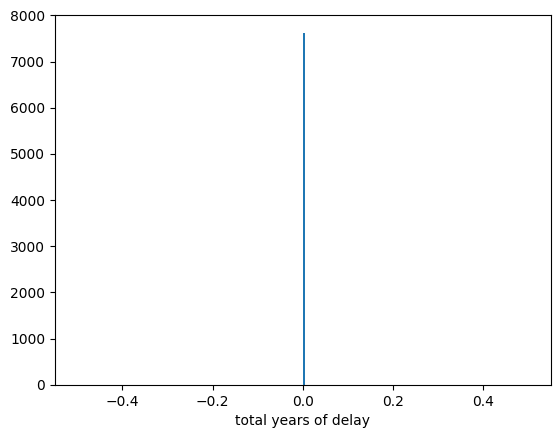

In [5]:
variables = VARIABLE_SETS['Cotra2020']
variables['RUNS'] = RUNS
variables['CURRENT_YEAR'] = CURRENT_YEAR
variables['MAX_YEAR'] = MAX_YEAR
run_timelines_model(variables, cores=5, runs=variables['RUNS'])

## Run Cotra 2022



## SAMPLE RUN 1 ##

In this simulation:
* It takes 30.1 log FLOP (~1.3 nonillion) for transformative capabilities.
* Every 3.0 years algorithms get 2x better, with 2 log reductions possible.
* FLOP start at a cost of 18.6 log FLOP (~3.7 quintillion) per 2025$USD.
* Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1.0 septillion) per 2025$USD.
* We are initially willing to pay 9.0 log 2025$USD (~995.9 million).
* This doubles every 2.5 year to a max of 1.0% of GDP (initially ~240.0 billion 2025$USD).
* GDP grows at a rate of 1.03x per year.
---
2025 - TAI takes 30.1 logFLOP which costs 11.5 log 2025$USD to buy vs. WTP at 9.0 (buys 27.6 log FLOP or 27.6 2025-log-eFLOP)
2026 - TAI takes 30.0 logFLOP which costs 11.3 log 2025$USD to buy vs. WTP at 9.1 (buys 27.8 log FLOP or 27.9 2025-log-eFLOP)
2027 - TAI takes 29.9 logFLOP which costs 11.1 log 2025$USD to buy vs. WTP at 9.2 (buys 28.0 log FLOP or 28.2 2025-log-eFLOP)
2028 - TAI takes 29.8 logFLOP which costs 10.9 log

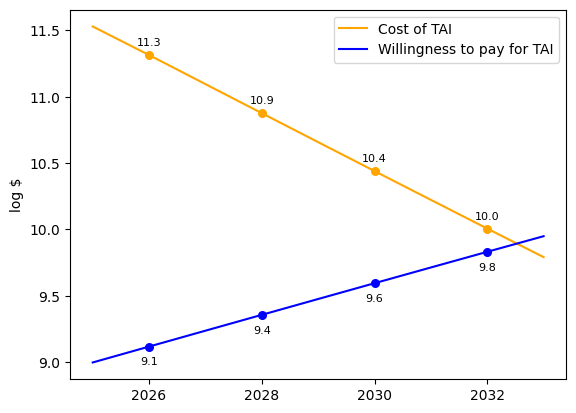



## SAMPLE RUN 2 ##

In this simulation:
* It takes 38.4 log FLOP (~251.2 thousand decillion) for transformative capabilities.
* Every 2 years algorithms get 2x better, with 4 log reductions possible.
* FLOP start at a cost of 18.6 log FLOP (~3.7 quintillion) per 2025$USD.
* Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1.0 septillion) per 2025$USD.
* We are initially willing to pay 9.0 log 2025$USD (~995.9 million).
* This doubles every 2.5 year to a max of 1.0% of GDP (initially ~240.0 billion 2025$USD).
* GDP grows at a rate of 1.03x per year.
---
2025 - TAI takes 38.4 logFLOP which costs 19.8 log 2025$USD to buy vs. WTP at 9.0 (buys 27.6 log FLOP or 27.6 2025-log-eFLOP)
2026 - TAI takes 38.2 logFLOP which costs 19.6 log 2025$USD to buy vs. WTP at 9.1 (buys 27.8 log FLOP or 28.0 2025-log-eFLOP)
2027 - TAI takes 38.1 logFLOP which costs 19.3 log 2025$USD to buy vs. WTP at 9.2 (buys 28.0 log FLOP or 28.3 2025-log-eFLOP)
2028 - TAI takes 37.9 logFLOP which costs

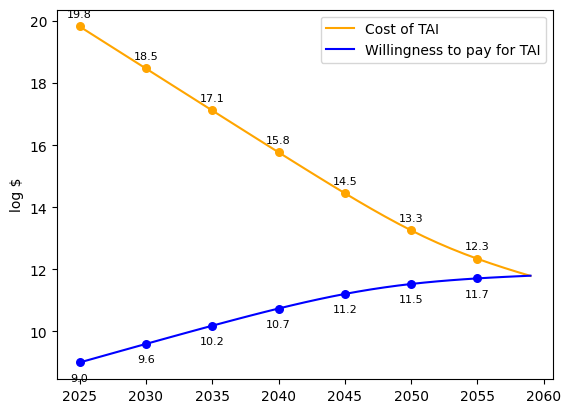



## SAMPLE RUN 3 ##

In this simulation:
* It takes 29.3 log FLOP (~199.5 octillion) for transformative capabilities.
* Every 3.5 years algorithms get 2x better, with 2 log reductions possible.
* FLOP start at a cost of 18.6 log FLOP (~3.7 quintillion) per 2025$USD.
* Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1.0 septillion) per 2025$USD.
* We are initially willing to pay 9.0 log 2025$USD (~995.9 million).
* This doubles every 2.5 year to a max of 1.0% of GDP (initially ~240.0 billion 2025$USD).
* GDP grows at a rate of 1.03x per year.
---
2025 - TAI takes 29.3 logFLOP which costs 10.7 log 2025$USD to buy vs. WTP at 9.0 (buys 27.6 log FLOP or 27.6 2025-log-eFLOP)
2026 - TAI takes 29.2 logFLOP which costs 10.5 log 2025$USD to buy vs. WTP at 9.1 (buys 27.8 log FLOP or 27.9 2025-log-eFLOP)
2027 - TAI takes 29.1 logFLOP which costs 10.3 log 2025$USD to buy vs. WTP at 9.2 (buys 28.0 log FLOP or 28.2 2025-log-eFLOP)
2028 - TAI takes 29.0 logFLOP which costs 10.1 l

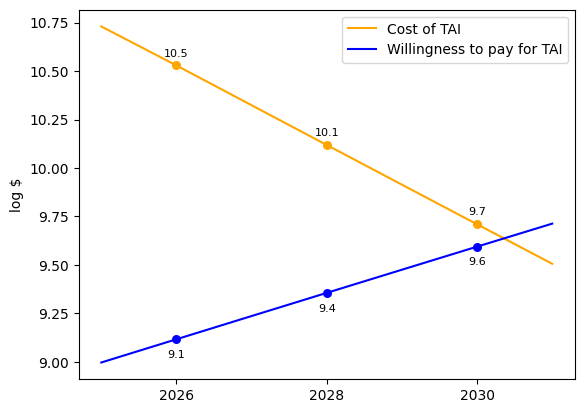



## RUN TIMELINES MODEL ##
Generating Bayes net with 5 cores...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1872.82it/s]


Shuffling data...
Writing data...
Waiting for other cores...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 618.52it/s]

...Collected!
Caching in-memory...
...Cached!
...Reducing
...Reduced!
...All done!

## DISTRIBUTION OF TAI ARRIVAL DATE ##
['5%: 2025',
 '10%: 2025',
 '15%: 2027',
 '20%: 2028',
 '25%: 2030',
 '35%: 2035',
 '50%: 2041',
 '60%: 2045',
 '75%: 2057',
 '80%: 2061',
 '90%: >2125',
 '95%: >2125']


## DISTRIBUTION OF RELATIVE TAI ARRIVAL DATE ##
['5%: 0 years from now',
 '10%: 0 years from now',
 '15%: 2 years from now',
 '20%: 3 years from now',
 '25%: 5 years from now',
 '35%: 10 years from now',
 '50%: 16 years from now',
 '60%: 20 years from now',
 '75%: 32 years from now',
 '80%: 36 years from now',
 '90%: >100 years from now',
 '95%: >100 years from now']
(Mean: 27 years from now)


## TAI ARRIVAL DATE BY BIN ##
This year: 11.6%
2026-2027: 6.4%
2028-2030: 7.6%
2030-2034: 11.5%
2035-2039: 10.8%
2040-2049: 22.9%
2050-2059: 10.5%
2060-2069: 5.4%
2070-2079: 1.6%
2080-2089: 0.2%
2090-2099: 0.5%
2100-2109: 0.1%
2110-2119: 0.2%
>2125: 12.7%


## TAI ARRIVAL DATE BY YEAR ##
By EOY 2025: 11.6%


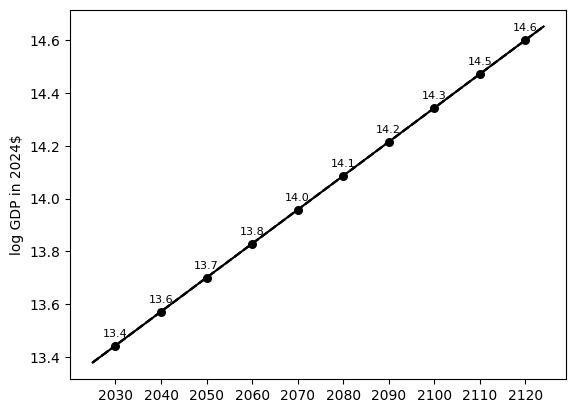

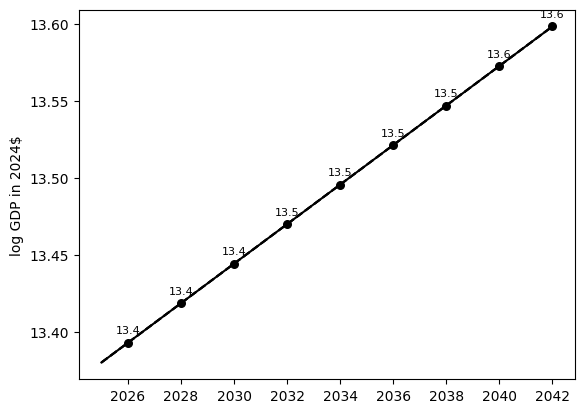



## Willingness to Pay Over Time ##
Year: 2025 - willingness log 2024$USD per year 9.0 (~995.9 million) 80% CI 9.0 (~995.9 million) - 9.0 (~995.9 million)
Year: 2026 - willingness log 2024$USD per year 9.1 (~1.3 billion) 80% CI 9.1 (~1.3 billion) - 9.1 (~1.3 billion)
Year: 2027 - willingness log 2024$USD per year 9.2 (~1.7 billion) 80% CI 9.2 (~1.7 billion) - 9.2 (~1.7 billion)
Year: 2028 - willingness log 2024$USD per year 9.4 (~2.3 billion) 80% CI 9.4 (~2.3 billion) - 9.4 (~2.3 billion)
Year: 2029 - willingness log 2024$USD per year 9.5 (~3.0 billion) 80% CI 9.5 (~3.0 billion) - 9.5 (~3.0 billion)
Year: 2030 - willingness log 2024$USD per year 9.6 (~3.9 billion) 80% CI 9.6 (~3.9 billion) - 9.6 (~3.9 billion)
Year: 2031 - willingness log 2024$USD per year 9.7 (~5.2 billion) 80% CI 9.7 (~5.2 billion) - 9.7 (~5.2 billion)
Year: 2032 - willingness log 2024$USD per year 9.8 (~6.8 billion) 80% CI 9.8 (~6.8 billion) - 9.8 (~6.8 billion)
Year: 2033 - willingness log 2024$USD per year 10.0 (

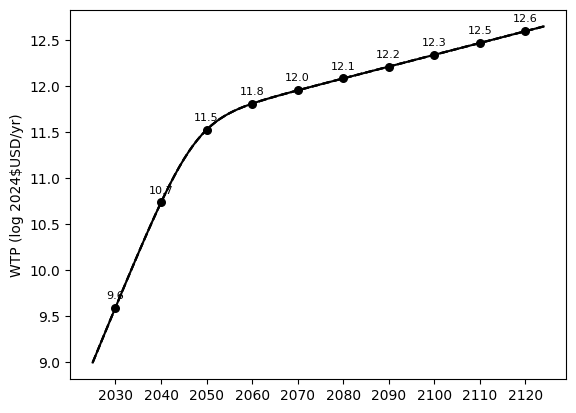

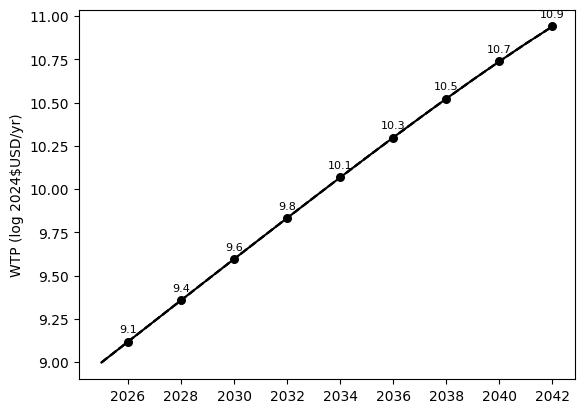



## Actual FLOP Needed to Make TAI (Given Algorithmic Progress) ##
Year: 2025 - logFLOP needed for TAI 32.5 (~316.2 nonillion) 80% CI 28.5 (~31.6 octillion) - 38.0 (~100.0 thousand decillion)
Year: 2026 - logFLOP needed for TAI 32.4 (~242.8 nonillion) 80% CI 28.4 (~26.3 octillion) - 37.8 (~70.7 thousand decillion)
Year: 2027 - logFLOP needed for TAI 32.3 (~184.8 nonillion) 80% CI 28.3 (~21.6 octillion) - 37.7 (~50.0 thousand decillion)
Year: 2028 - logFLOP needed for TAI 32.1 (~140.8 nonillion) 80% CI 28.2 (~17.8 octillion) - 37.5 (~35.4 thousand decillion)
Year: 2029 - logFLOP needed for TAI 32.0 (~107.5 nonillion) 80% CI 28.2 (~14.6 octillion) - 37.4 (~25.0 thousand decillion)
Year: 2030 - logFLOP needed for TAI 31.9 (~82.2 nonillion) 80% CI 28.1 (~12.1 octillion) - 37.2 (~17.7 thousand decillion)
Year: 2031 - logFLOP needed for TAI 31.8 (~63.1 nonillion) 80% CI 28.0 (~10.0 octillion) - 37.1 (~12.5 thousand decillion)
Year: 2032 - logFLOP needed for TAI 31.7 (~48.6 nonillion) 80% CI

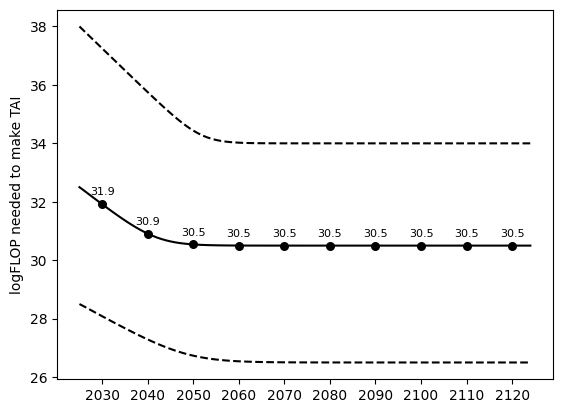

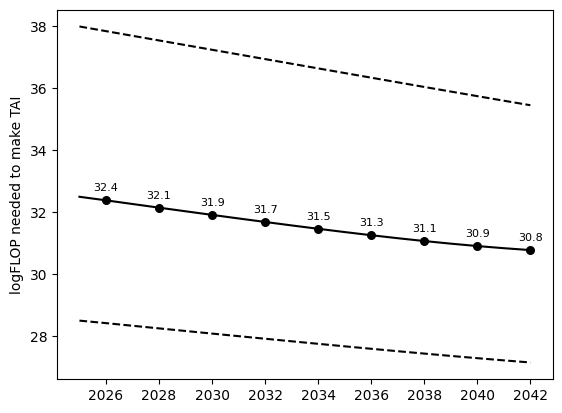



## FLOP per Dollar (Given Declining Costs) ##
Year: 2025 - logFLOP per 2024$1USD 18.6 (~3.7 quintillion) 80% CI 18.6 (~3.7 quintillion) - 18.6 (~3.7 quintillion)
Year: 2026 - logFLOP per 2024$1USD 18.7 (~4.9 quintillion) 80% CI 18.7 (~4.9 quintillion) - 18.7 (~4.9 quintillion)
Year: 2027 - logFLOP per 2024$1USD 18.8 (~6.5 quintillion) 80% CI 18.8 (~6.5 quintillion) - 18.8 (~6.5 quintillion)
Year: 2028 - logFLOP per 2024$1USD 18.9 (~8.5 quintillion) 80% CI 18.9 (~8.5 quintillion) - 18.9 (~8.5 quintillion)
Year: 2029 - logFLOP per 2024$1USD 19.1 (~11.3 quintillion) 80% CI 19.1 (~11.3 quintillion) - 19.1 (~11.3 quintillion)
Year: 2030 - logFLOP per 2024$1USD 19.2 (~14.9 quintillion) 80% CI 19.2 (~14.9 quintillion) - 19.2 (~14.9 quintillion)
Year: 2031 - logFLOP per 2024$1USD 19.3 (~19.6 quintillion) 80% CI 19.3 (~19.6 quintillion) - 19.3 (~19.6 quintillion)
Year: 2032 - logFLOP per 2024$1USD 19.4 (~25.9 quintillion) 80% CI 19.4 (~25.9 quintillion) - 19.4 (~25.9 quintillion)
Year: 2033 -

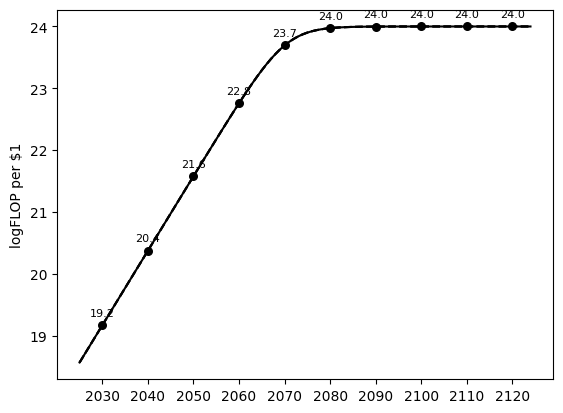

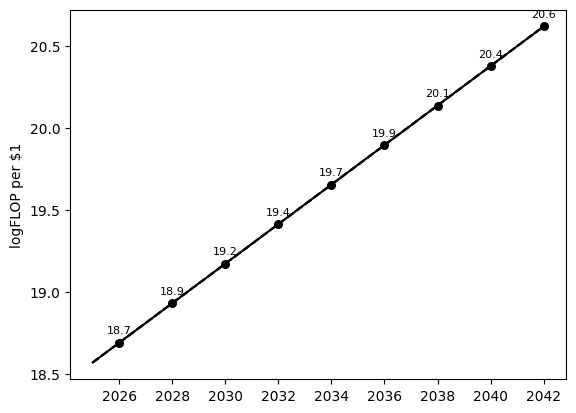



## Max Possible OOM Reduction in TAI FLOP Size ##
TAI log FLOP 20 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 21 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 22 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 23 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 24 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 25 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 26 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 27 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 28 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 29 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 30 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 31 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 32 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 33 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2

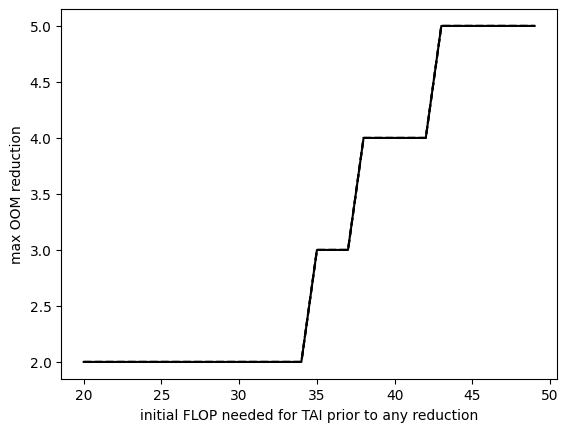



## Halving time (years) of compute requirements ##
TAI log FLOP 20 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 21 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 22 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 23 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 24 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 25 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 26 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 27 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 28 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 29 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 30 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 31 -> algo doubling rate 3.0yrs (80% CI: 3.0 to 3.0)
TAI log FLOP 32 -> algo doubling rate 2.5yrs (80% CI: 2.5 to 2.5)
TAI log FLOP 33 -> algo doubling rate 2.5yrs (80% CI: 2.5 to 2.5)
TAI log FLOP 34 -> algo

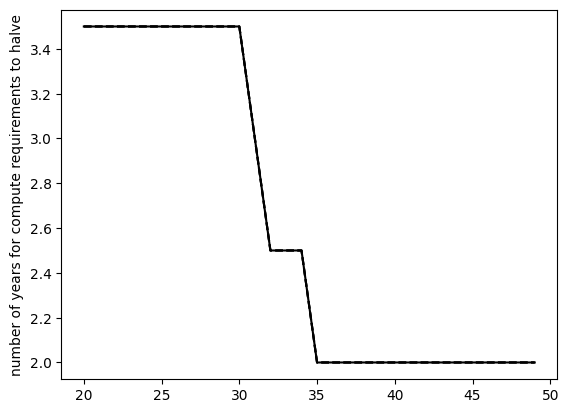



## Dollars Needed to Buy TAI (Given Algorithmic Progress and Decline in Cost per FLOP) ##
Year: 2025 - 13.9 log 2024$USD to buy TAI (~85.1 trillion) 80% CI 9.9 (~8.5 billion) - 19.4 (~26.9 quintillion)
Year: 2026 - 13.7 log 2024$USD to buy TAI (~49.5 trillion) 80% CI 9.7 (~5.4 billion) - 19.2 (~14.4 quintillion)
Year: 2027 - 13.5 log 2024$USD to buy TAI (~28.6 trillion) 80% CI 9.5 (~3.3 billion) - 18.9 (~7.7 quintillion)
Year: 2028 - 13.2 log 2024$USD to buy TAI (~16.5 trillion) 80% CI 9.3 (~2.1 billion) - 18.6 (~4.1 quintillion)
Year: 2029 - 13.0 log 2024$USD to buy TAI (~9.5 trillion) 80% CI 9.1 (~1.3 billion) - 18.3 (~2.2 quintillion)
Year: 2030 - 12.7 log 2024$USD to buy TAI (~5.5 trillion) 80% CI 8.9 (~811.8 million) - 18.1 (~1.2 quintillion)
Year: 2031 - 12.5 log 2024$USD to buy TAI (~3.2 trillion) 80% CI 8.7 (~507.6 million) - 17.8 (~638.0 quadrillion)
Year: 2032 - 12.3 log 2024$USD to buy TAI (~1.9 trillion) 80% CI 8.5 (~317.8 million) - 17.5 (~342.0 quadrillion)
Year: 2033 -

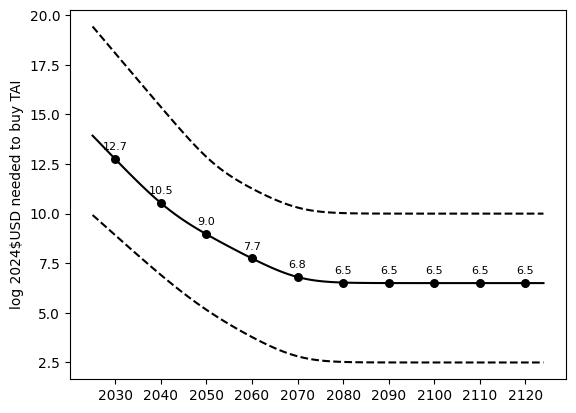

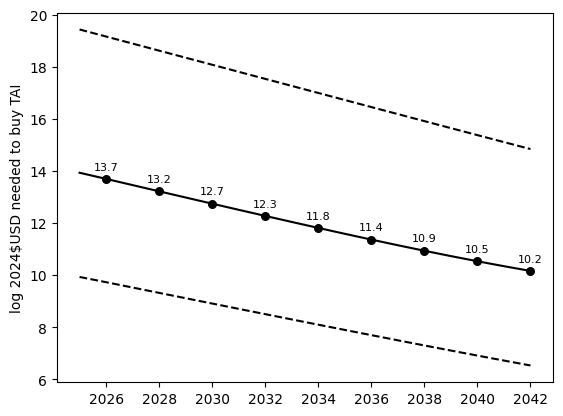



## Actual FLOP at Max Spend ##
Year: 2025 - max log FLOP 27.6 (~3.7 octillion) 80% CI 27.6 (~3.7 octillion) - 27.6 (~3.7 octillion)
Year: 2026 - max log FLOP 27.8 (~6.4 octillion) 80% CI 27.8 (~6.4 octillion) - 27.8 (~6.4 octillion)
Year: 2027 - max log FLOP 28.0 (~11.2 octillion) 80% CI 28.0 (~11.2 octillion) - 28.0 (~11.2 octillion)
Year: 2028 - max log FLOP 28.3 (~19.4 octillion) 80% CI 28.3 (~19.4 octillion) - 28.3 (~19.4 octillion)
Year: 2029 - max log FLOP 28.5 (~33.8 octillion) 80% CI 28.5 (~33.8 octillion) - 28.5 (~33.8 octillion)
Year: 2030 - max log FLOP 28.8 (~58.6 octillion) 80% CI 28.8 (~58.6 octillion) - 28.8 (~58.6 octillion)
Year: 2031 - max log FLOP 29.0 (~101.6 octillion) 80% CI 29.0 (~101.6 octillion) - 29.0 (~101.6 octillion)
Year: 2032 - max log FLOP 29.2 (~176.0 octillion) 80% CI 29.2 (~176.0 octillion) - 29.2 (~176.0 octillion)
Year: 2033 - max log FLOP 29.5 (~304.5 octillion) 80% CI 29.5 (~304.5 octillion) - 29.5 (~304.5 octillion)
Year: 2034 - max log FLOP 29

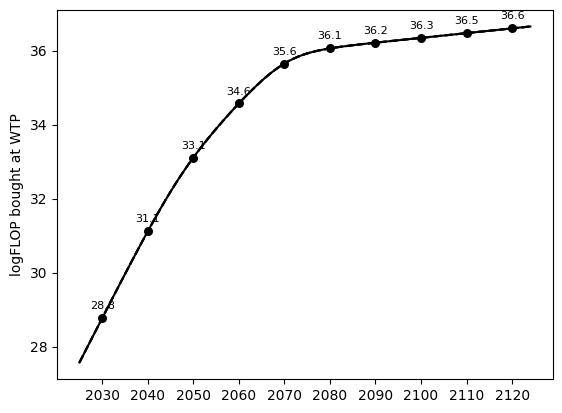

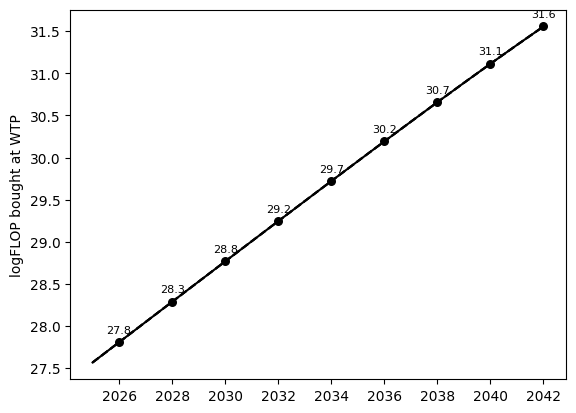



## Effective 2024-FLOP at Max Spend (given algorithmic progress and decline in $/FLOP) ##
Year: 2025 - max log effective 2024-FLOP 27.6 (~3.7 octillion) 80% CI 27.6 (~3.7 octillion) - 27.6 (~3.7 octillion)
Year: 2026 - max log effective 2024-FLOP 27.9 (~8.4 octillion) 80% CI 27.9 (~7.7 octillion) - 28.0 (~9.1 octillion)
Year: 2027 - max log effective 2024-FLOP 28.3 (~19.1 octillion) 80% CI 28.2 (~16.4 octillion) - 28.3 (~22.4 octillion)
Year: 2028 - max log effective 2024-FLOP 28.6 (~43.7 octillion) 80% CI 28.5 (~34.6 octillion) - 28.7 (~55.0 octillion)
Year: 2029 - max log effective 2024-FLOP 29.0 (~99.3 octillion) 80% CI 28.9 (~72.9 octillion) - 29.1 (~135.0 octillion)
Year: 2030 - max log effective 2024-FLOP 29.4 (~225.4 octillion) 80% CI 29.2 (~153.6 octillion) - 29.5 (~331.3 octillion)
Year: 2031 - max log effective 2024-FLOP 29.7 (~509.5 octillion) 80% CI 29.5 (~322.9 octillion) - 29.9 (~812.4 octillion)
Year: 2032 - max log effective 2024-FLOP 30.1 (~1.1 nonillion) 80% CI 29.8

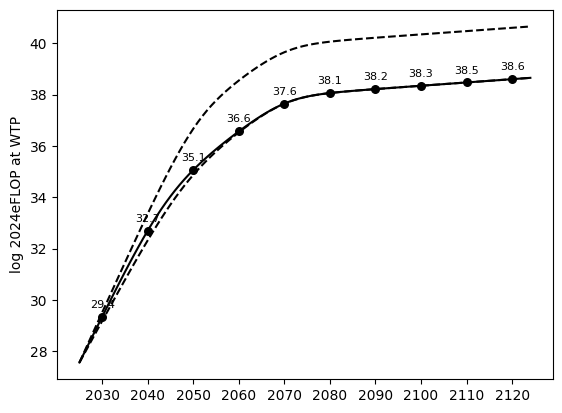

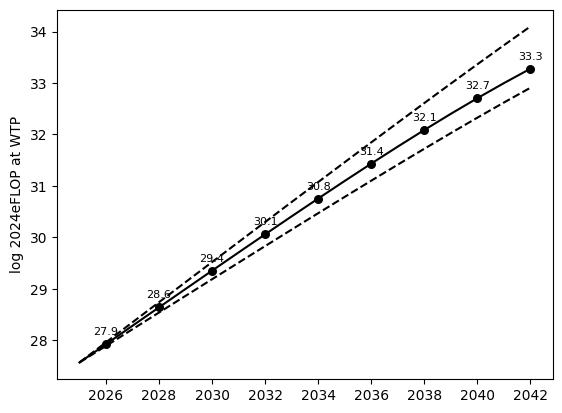


## TAI FLOP SIZE ##
{1: 25.499,
 5: 26.7,
 10: 27.3,
 20: 28.5,
 30: 29.8,
 40: 31.2,
 50: 32.5,
 60: 34.3,
 70: 36.1,
 80: 38.0,
 90: 41.92,
 95: 59.404999999999994,
 99: 66.20100000000001}


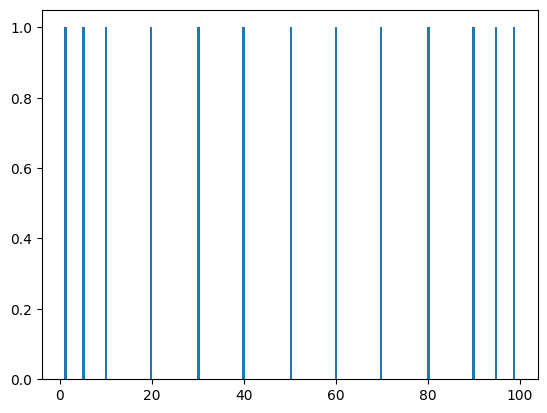



## MIN REDUCTION: 2 ##

## MAX REDUCTION: 5 ##

## MIN ALGO DOUBLING RATE: 2 ##

## MAX ALGO DOUBLING RATE: 3.5 ##

## INITIAL FLOP PER DOLLAR: 18.57 ##

## FLOP HALVING RATE: 2.5 ##

## MAX FLOP PER DOLLAR: 24 ##

## INITIAL PAY: 9 ##

## INITIAL GDP: 24000000000000 ##

## GDP GROWTH: 1.03 ##

## MAX GDP FRAC: 0.01 ##

## SPEND DOUBLING TIME: 2.5 ##



## Aggregate nonscaling delay probability ##
If TAI compute level achieved in 2024-2026... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2027-2030... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2031-2035... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2036-2040... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2041-2050... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2051-2060... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2061-2100... 0% chance of TAI nonscaling delay


## Aggregate nonscaling delay lengt

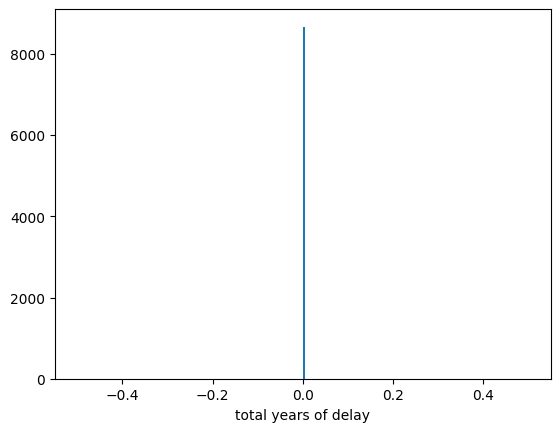

In [6]:
variables = VARIABLE_SETS['Cotra2022']
variables['RUNS'] = RUNS
variables['CURRENT_YEAR'] = CURRENT_YEAR
variables['MAX_YEAR'] = MAX_YEAR
run_timelines_model(variables, cores=5, runs=RUNS)

In [7]:
print('File last ran: {}'.format(dt.now()))

File last ran: 2024-04-26 10:10:24.132162
